<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P3_01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 3

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 3


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importation des données

In [ ]:
df_2015 = pad.read_csv('2015-building-energy-benchmarking.csv')
df_2016 = pad.read_csv('2016-building-energy-benchmarking.csv')

Exploration rapide des données

In [ ]:
print(df_2015.shape)
print(df_2016.shape)

(3340, 40)
(3376, 40)


In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   TaxParcelIdentificationNumber    3338 non-null   object 
 6   CouncilDistrictCode              3340 non-null   int64  
 7   Neighborhood                     3340 non-null   object 
 8   YearBuilt                        3340 non-null   int64  
 9   NumberofBuildings                3340 non-null   int64  
 10  NumberofFloors                   3332 non-null   float64
 11  PropertyGFATotal                 3340 non-null   int64  
 12  PropertyGFAParking  

In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [ ]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [ ]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [ ]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [ ]:
df_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [ ]:
df_2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# Gestion des deux dataframes 2015 - 2016

Les colonnes ne semblent pas correspondent entre les deux années, il va falloir formatter ça pour les rendre exploitables

In [ ]:
coloumns_2015 = list(df_2015.columns) 
coloumns_2016 = list(df_2016.columns)

for i in range(len(coloumns_2016)):
  print(coloumns_2015[i] == coloumns_2016[i])

True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


Evaluation des colonnes discordantes :
Pour cela utilisation des "set" qui à l'opposé des list ne prennent qu'une occurence d'un élément et ne sont pas ordonnées (car sinon erreur : "TypeError: unsupported operand type(s) for -: 'list' and 'list'")

In [ ]:
dif_2015_to_2016 = set(coloumns_2015) - set(coloumns_2016)
dif_2016_to_2015 = set(coloumns_2016) - set(coloumns_2015)

In [ ]:
dif_2015_to_2016

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [ ]:
dif_2016_to_2015

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [ ]:
df_2015['City Council Districts'].isna().sum()

3127

Les variables '2010 Census Tracts', 'OtherFuelUse(kBtu)', 'SPD Beats' et 'Seattle Police Department Micro Community Policing Plan Areas' ne sont présentes qu'en 2015 et 'City Council Districts' ne contient quasiment que des NaN on va donc les supprimer.

In [ ]:
df_2015.drop(['2010 Census Tracts', 'City Council Districts', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas'], axis=1, inplace=True)

In [ ]:
df_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [ ]:
df_2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [ ]:
df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [ ]:
df_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

Les variables concernant les émissions de GHG ne se nomment pas pareil mais sembles correspondrent on ne va pas les supprimer mais les renommer (idem pour "Comment" et Zip Codes").

In [ ]:
df_2015 = df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions", 
                                  "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity",
                                  "Comment":"Comments", 
                                  "Zip Codes":"ZipCode"})

In [ ]:
df_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Enfin, la variable location semble contenir des infos qui sont splitter dans la database de 2016, on pourrait les extraires, cependant est-ce vraiment utile pour la problématique du projet ? 
L'idée étant de prédire la consommation en énergie il est peu probable que la latitude ou la longitude impact la consommation car nous sommes à l'échelle d'une ville, tout comme le code postal.
Enfin le nom de la ville ne sert pas à grand chose car ce sont toutes des données de Seattle...
Je supprime donc la variable 'Location' et 'ZipCode' en 2015 et les variables 'Address', 'City', 'Latitude', 'Longitude', 'State', 'ZipCode' en 2016

In [ ]:
df_2015.drop(['Location', 'ZipCode'], axis=1, inplace=True)
df_2016.drop(['Address', 'City', 'Latitude', 'Longitude', 'State', 'ZipCode'], axis=1, inplace=True)

Je vérifie qu'il n'y a maintenant plus de différence entre les deux datasets

In [ ]:
dif_2015_to_2016 = set(df_2015.columns) - set(df_2016.columns)
dif_2016_to_2015 = set(df_2016.columns) - set(df_2015.columns)

In [ ]:
dif_2015_to_2016

set()

In [ ]:
dif_2016_to_2015

set()

Les deux datasets ont maintenant les mêmes features, on peut les concaténer pour ne faire qu'un dataset

In [ ]:
df = pad.concat([df_2015[df_2016.columns],df_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
df.shape

(6716, 40)

# Nettoyage des données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

Il y a quelques variables qui présentent beaucoup de NaN et qui ne semblent pas importante pour la problématique. J'applique un filtre qui supprime les features qui ont plus de 50% de NaN

In [ ]:
df = df[df.columns[df.isna().sum()/len(df)*100 <= 50]]

In [ ]:
df.shape

(6716, 33)

De plus, les modélisations que je vais faire ont besoin d'avoir l'information de l'émission des GES. Il n'est donc pas nécessaire de garder les lignes qui ont des NaN dans la cases correspondant à l'émission des GES

In [ ]:
df[df['GHGEmissionsIntensity'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
62,87,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),2518400005,1,SOUTHWEST,1948,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
719,19694,2015,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),519000290,3,CENTRAL,1925,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
767,19798,2015,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,225049032,4,NORTHEAST,1977,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
1346,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,7,MAGNOLIA / QUEEN ANNE,1967,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
1358,21570,2015,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),2044500390,5,NORTH,1950,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Compliant,NaN,NaN
1360,21578,2015,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),2095200005,1,SOUTHWEST,1949,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
1838,23508,2015,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,7677290000,7,MAGNOLIA / QUEEN ANNE,1930,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
2108,24408,2015,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),3126049064,5,NORTHWEST,1953,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
2381,25361,2015,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),6392002430,4,NORTHEAST,1961,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
2406,25451,2015,NonResidential,Restaurant\n,YALE STREET LANDING,4088803010,3,LAKE UNION,1978,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,NaN,NaN


In [ ]:
df[df['TotalGHGEmissions'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
62,87,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),2518400005,1,SOUTHWEST,1948,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
719,19694,2015,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),519000290,3,CENTRAL,1925,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
767,19798,2015,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,225049032,4,NORTHEAST,1977,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
1346,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,7,MAGNOLIA / QUEEN ANNE,1967,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
1358,21570,2015,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),2044500390,5,NORTH,1950,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Compliant,NaN,NaN
1360,21578,2015,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),2095200005,1,SOUTHWEST,1949,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
1838,23508,2015,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,7677290000,7,MAGNOLIA / QUEEN ANNE,1930,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Not Compliant,NaN,NaN
2108,24408,2015,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),3126049064,5,NORTHWEST,1953,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
2381,25361,2015,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),6392002430,4,NORTHEAST,1961,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Compliant,NaN,NaN
2406,25451,2015,NonResidential,Restaurant\n,YALE STREET LANDING,4088803010,3,LAKE UNION,1978,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,NaN,NaN


In [ ]:
df = df[df['TotalGHGEmissions'].isna() == False]
df = df[df['GHGEmissionsIntensity'].isna() == False]

In [ ]:
df['DataYear'].isna().value_counts()

False    6697
Name: DataYear, dtype: int64

Il y a trois NaN dans l'année de la database, je choisi de les remplacer par la valeur 2015

In [ ]:
df[df["DataYear"].isna() == True ] = 2015
df['DataYear'] = pad.to_numeric(df['DataYear'], downcast='integer')

Il y a des impossibilité type une surface négative, je choisi de les remplacer par des NaN

In [ ]:
df[df["PropertyGFAParking"] < 0 ] = np.nan

In [ ]:
df['BuildingType'].value_counts()

NonResidential          2917
Multifamily LR (1-4)    2037
Multifamily MR (5-9)    1133
Multifamily HR (10+)     217
SPS-District K-12        191
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

Dans l'AO il est mentionné *"votre équipe s’intéresse de près aux émissions des bâtiments **non destinés à l’habitation**"*. il apparait donc nécessaire ici de supprimer les lignes correspondantes aux maisons résidentielles, information que l'on peut trouver dans le feature : *BuildingType*

In [ ]:
df = df[df['BuildingType'] == "NonResidential"]

In [ ]:
df['NumberofBuildings'].value_counts()

1.0    2833
0.0      45
2.0      13
3.0      11
6.0       5
5.0       4
7.0       2
4.0       2
9.0       1
8.0       1
Name: NumberofBuildings, dtype: int64

In [ ]:
df['NumberofFloors'].value_counts()

1.0     765
2.0     645
3.0     478
4.0     275
5.0     198
6.0     165
7.0      67
8.0      41
11.0     33
10.0     33
0.0      18
12.0     16
9.0      16
14.0     15
15.0     13
13.0     12
42.0     10
19.0     10
17.0      8
20.0      6
18.0      6
24.0      6
16.0      6
22.0      6
25.0      6
29.0      6
33.0      6
21.0      6
23.0      5
34.0      4
36.0      4
41.0      4
27.0      2
28.0      2
76.0      2
99.0      2
30.0      2
56.0      2
47.0      2
46.0      2
55.0      2
37.0      2
49.0      2
39.0      2
Name: NumberofFloors, dtype: int64

Les variables *NumberofBuildings* et *NumberofFloors* ne peuvent être égales à 0, je supprime donc les lignes avec 0 

In [ ]:
df = df[df['NumberofBuildings'] != 0]
df = df[df['NumberofFloors'] != 0]

Les variables présentant un "WN" à la fin sont des normalisations des autres variables, s'ils n'apportent pas plus d'information on peut les supprimer

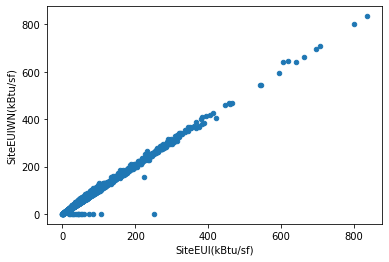

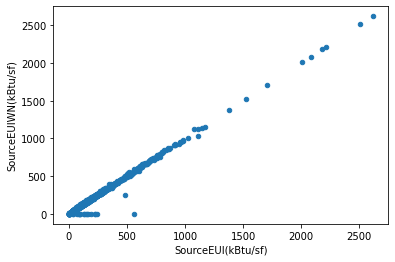

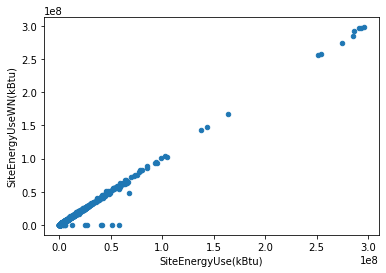

In [ ]:
df.plot.scatter(x='SiteEUI(kBtu/sf)',y='SiteEUIWN(kBtu/sf)',)
df.plot.scatter(x='SourceEUI(kBtu/sf)',y='SourceEUIWN(kBtu/sf)')
df.plot.scatter(x='SiteEnergyUse(kBtu)',y='SiteEnergyUseWN(kBtu)')

In [ ]:
df.drop(['SiteEUIWN(kBtu/sf)'], axis=1, inplace=True)
df.drop(['SourceEUIWN(kBtu/sf)'], axis=1, inplace=True)
df.drop(['SiteEnergyUseWN(kBtu)'], axis=1, inplace=True)

On remarque aussi que les features "Electricity" et "NaturalGas" ont deux unités, ce qui n'est pas nécessaire pour la construction du modèle, je choisi de supprimer les features avec l'unité BTU

In [ ]:
df.drop(['Electricity(kBtu)'], axis=1, inplace=True)
df.drop(['NaturalGas(kBtu)'], axis=1, inplace=True)

In [ ]:
df['ComplianceStatus'].value_counts()

Compliant                       2829
Non-Compliant                     15
Error - Correct Default Data      10
Missing Data                       1
Name: ComplianceStatus, dtype: int64

La variable *ComplianceStatus* nous informe sur la validité des données, je supprimer les lignes avec un *compliancestatus* différent de *compliant* et ensuite la colonne *ComplianceStatus*

In [ ]:
df = df[df['ComplianceStatus'] == "Compliant"]
df.drop(['ComplianceStatus'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df['DefaultData'].value_counts()

False    1375
No       1341
Yes       113
Name: DefaultData, dtype: int64

Le sens de la variable *DefaultData* n'est pas identifié, suppresion du feature

In [ ]:
df.drop(['DefaultData'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


*PropertyName* et *TaxParcelIdentificationNumber* n'apporte pas plus d'infos en comparaison à *OSEBuildingID*, je choisi donc de supprimer ces features

In [ ]:
df.drop(['TaxParcelIdentificationNumber'], axis=1, inplace=True)
df.drop(['PropertyName'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Identification des valeurs aberrantes

In [ ]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2825.000000,2.829000e+03,2829.000000,2.829000e+03,2.765000e+03,1953.000000,2829.000000,2829.000000,2.829000e+03,2.829000e+03,2.829000e+03,2.829000e+03,2829.000000,2829.000000
mean,15801.319901,2015.486037,4.429480,1960.486037,1.037116,4.398938,1.104597e+05,14597.020148,9.586266e+04,8.900124e+04,63.122888,72.382927,179.360976,7.559192e+06,4.988120e+05,1.586059e+06,1.626428e+04,162.608473,1.425970
std,12979.346570,0.499893,2.195951,32.849775,0.389530,6.821515,1.884343e+05,44983.735025,1.626351e+05,1.550770e+05,28.949791,73.498279,186.851719,1.902668e+07,5.387524e+06,3.903882e+06,5.594646e+04,582.092302,2.098789
min,1.000000,2015.000000,1.000000,1900.000000,1.000000,1.000000,1.630000e+04,0.000000,-5.055000e+04,5.656000e+03,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-3.382680e+04,0.000000e+00,-0.800000,-0.020000
25%,606.000000,2015.000000,2.000000,1929.000000,1.000000,1.000000,2.884400e+04,0.000000,2.803200e+04,2.500000e+04,44.000000,33.200001,76.400002,1.159807e+06,0.000000e+00,2.039280e+05,0.000000e+00,18.760000,0.250000
50%,21119.000000,2015.000000,4.000000,1965.000000,1.000000,3.000000,4.741500e+04,0.000000,4.515500e+04,4.125600e+04,70.000000,52.299999,134.900000,2.512319e+06,0.000000e+00,4.786946e+05,4.085000e+03,46.360000,0.700000
75%,24488.000000,2016.000000,7.000000,1987.000000,1.000000,5.000000,1.029300e+05,0.000000,9.080300e+04,8.557200e+04,88.000000,81.900002,208.300003,6.858534e+06,0.000000e+00,1.468084e+06,1.303100e+04,131.400000,1.710000
max,50094.000000,2016.000000,7.000000,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,100.000000,834.400024,2620.000000,2.958126e+08,1.349435e+08,8.344505e+07,1.381912e+06,12307.160000,31.380000


Il ne semble pas avoir beaucoup de valeurs aberrantes dans ce dataset, exception faite des valeurs négatives trouvées dans les features PropertyGFAParking, PropertyGFABuilding, LargestPropertyUseTypeGFA, SourceEUI(kBtu/sf), Electricity(kWh), TotalGHGEmissions et GHGEmissionsIntensity

In [ ]:
df[df['TotalGHGEmissions'] < 0 ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
3206,49784.0,2016.0,NonResidential,Small- and Mid-Sized Office,3.0,CENTRAL,2013.0,1.0,6.0,52000.0,...,48159.0,100.0,7.1,2.0,342726.0938,0.0,-33826.80078,0.0,-0.8,-0.02


Il n'y a qu'une seule occurence d'un batiment ayant une émission de GES négative. La valeur n'est pas énormement négative, on pourrait donc penser que cette valeur n'est pas aberrante et penser que c'est une batiment avec des panneaux solaires etc etc... En argument pour cette hypothèse, l'ENERGYSTARScore de ce produit est d'ailleurs de 100. Cependant pour la problématique du projet, ce n'est pas intéressant d'avoir des batiments produisant de l'énergie, je remplace donc par des NaN

In [ ]:
df[df['SourceEUI(kBtu/sf)'] < 0 ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
3246,49784.0,2015.0,NonResidential,Small- and Mid-Sized Office,3.0,CENTRAL,2013.0,1.0,6.0,41929.0,...,48159.0,100.0,11.7,-2.0,562479.0,0.0,164853.0,0.0,3.92,0.04


In [ ]:
df[df["PropertyGFABuilding(s)"] < 0 ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
3139,29788.0,2015.0,NonResidential,Small- and Mid-Sized Office,7.0,MAGNOLIA / QUEEN ANNE,1982.0,1.0,5.0,54015.0,...,54015.0,65.0,64.0,200.9,3455247.0,0.0,1012675.0,0.0,24.09,0.17
3322,50002.0,2015.0,NonResidential,Other,4.0,NORTHEAST,2014.0,1.0,3.0,33648.0,...,83600.0,NaN,35.6,111.9,1389553.0,0.0,407255.0,0.0,9.69,0.11


Idem pour le batiment 3246 ayant une valeur négative pour le *SourceEUI*

In [ ]:
df.drop(df[df['TotalGHGEmissions'] < 0 ].index, inplace=True)
df.drop(df[df['SourceEUI(kBtu/sf)'] < 0 ].index, inplace=True)
df.drop(df[df['PropertyGFAParking'] < 0 ].index, inplace=True)
df.drop(df[df['PropertyGFABuilding(s)'] < 0 ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


En revanche il n'y a pas de logique à ce qu'il y ait des surfaces négatives, je supprime les lignes dans ce cas car le reste des données de la ligne est peut être compromis aussi et cela ne représente que quelques lignes donc très peu de données

Pour supprimer les valeurs aberrantes , j'effectue une suppression des données significativement (p<0.05) différentes de la valeur moyenne
(Différence avec la moyenne > 1.96 * écart-type)

PS : je fais cette opération car plus loin je vérifie la présence de valeur aberrantes et de plus j'ai observé que les modèles fonctionnaient mieux sans ces outliers


In [ ]:
list_of_quantitative_variables_to_analyse = ["NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEnergyUse(kBtu)","SteamUse(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TotalGHGEmissions", "GHGEmissionsIntensity"]
dfQ = df[list_of_quantitative_variables_to_analyse]
dfQ = dfQ[np.abs(dfQ-dfQ.mean()) <= (1.96*dfQ.std())]
dfQ_abb = df[list_of_quantitative_variables_to_analyse]
dfQ_aberrante = dfQ_abb[np.abs(dfQ_abb-dfQ_abb.mean()) >= (1.96*dfQ_abb.std())]

In [ ]:
dfQ_aberrante.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,38.000000,107.000000,1.070000e+02,133.000000,1.040000e+02,9.100000e+01,101.000000,142.000000,123.000000,7.900000e+01,2.800000e+01,8.400000e+01,5.000000e+01,45.000000,130.000000
mean,3.763158,32.299065,8.788311e+05,182920.721805,7.797958e+05,7.731294e+05,2.534653,314.894367,802.865854,8.718464e+07,3.754800e+07,1.766997e+07,3.029932e+05,3438.017333,8.720615
std,1.965021,15.071662,3.815329e+05,84388.092855,3.360654e+05,3.335502e+05,1.688575,117.233364,386.577099,6.858665e+07,3.936524e+07,1.303892e+07,2.745377e+05,2964.466655,3.570205
min,2.000000,18.000000,4.807020e+05,103032.000000,4.156320e+05,4.005360e+05,1.000000,217.100006,550.700012,4.498447e+07,1.159869e+07,9.439097e+06,1.262546e+05,1359.770000,5.550000
25%,2.000000,21.500000,5.659225e+05,118744.000000,5.293750e+05,5.201870e+05,1.000000,242.125000,599.950000,5.231925e+07,1.586495e+07,1.157412e+07,1.577741e+05,1793.900000,6.312500
50%,3.000000,29.000000,7.550000e+05,156407.000000,6.611365e+05,7.184730e+05,2.000000,275.649997,687.200000,5.975744e+07,1.996949e+07,1.382950e+07,1.908643e+05,2055.820000,7.640000
75%,5.000000,41.000000,1.123435e+06,201857.000000,9.730242e+05,9.889065e+05,4.000000,333.574997,799.350000,7.956064e+07,3.143764e+07,1.677926e+07,3.118008e+05,3278.110000,9.947500
max,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,6.000000,834.400024,2620.000000,2.958126e+08,1.349435e+08,8.344505e+07,1.381912e+06,12307.160000,31.380000


In [ ]:
df[list_of_quantitative_variables_to_analyse].describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,2823.000000,2819.000000,2.823000e+03,2823.000000,2.823000e+03,2.759000e+03,1949.000000,2823.000000,2823.000000,2.823000e+03,2.823000e+03,2.823000e+03,2.823000e+03,2823.000000,2823.000000
mean,1.037194,4.399787,1.105757e+05,14563.743181,9.601192e+04,8.893027e+04,63.065675,72.476656,179.582926,7.570919e+06,4.998721e+05,1.588341e+06,1.629423e+04,162.903670,1.428537
std,0.389940,6.828281,1.886144e+05,44982.149990,1.627553e+05,1.551763e+05,28.943899,73.541194,186.955806,1.904504e+07,5.393199e+06,3.907669e+06,5.600172e+04,582.673702,2.100237
min,1.000000,1.000000,1.630000e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,2.884100e+04,0.000000,2.805200e+04,2.499500e+04,44.000000,33.299999,76.450001,1.160398e+06,0.000000e+00,2.042161e+05,0.000000e+00,18.855000,0.250000
50%,1.000000,3.000000,4.741500e+04,0.000000,4.515500e+04,4.119800e+04,70.000000,52.300000,135.199997,2.513155e+06,0.000000e+00,4.790040e+05,4.107000e+03,46.450000,0.710000
75%,1.000000,5.000000,1.029650e+05,0.000000,9.122600e+04,8.557200e+04,88.000000,82.000000,208.449997,6.861380e+06,0.000000e+00,1.471059e+06,1.305971e+04,131.760000,1.720000
max,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,100.000000,834.400024,2620.000000,2.958126e+08,1.349435e+08,8.344505e+07,1.381912e+06,12307.160000,31.380000


In [ ]:
df[df["NumberofFloors"] == 99 ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
1371,21611.0,2015.0,NonResidential,Worship Facility,2.0,GREATER DUWAMISH,1977.0,1.0,99.0,21948.0,...,21948.0,54.0,14.5,45.500000,318205.0000,0.0,93261.0,0.0,2.22,0.04
1359,21611.0,2016.0,NonResidential,Worship Facility,2.0,GREATER DUWAMISH,1977.0,1.0,99.0,21948.0,...,21948.0,80.0,14.9,46.599998,326001.1875,0.0,95545.5,0.0,2.27,0.10


Ce batiment semble bien correspondre à une erreur, 99 étages pour une surface si faible, avec un energystarscore qui passe de 50 à 80 sans aucune modification majeures.

In [ ]:
dfQ_aberrante

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,41.0,961990.0,NaN,961990.0,757243.0,NaN,NaN,NaN,73130656.0,19660404.0,14583930.0,NaN,2061.48,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,460.4,636.3,NaN,23458518.0,NaN,NaN,1936.34,31.38
4,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[list_of_quantitative_variables_to_analyse] = dfQ

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(2823, 24)

# Analyse Exploratoire des données

In [ ]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,2823.000000,2823.000000,2823.000000,2823.000000,2785.0,2712.000000,2716.000000,2690.000000,2719.000000,2668.000000,1848.000000,2681.000000,2700.000000,2.744000e+03,2.795000e+03,2.739000e+03,2773.000000,2778.000000,2693.000000
mean,15736.038966,2015.486362,4.431456,1960.393199,1.0,3.299041,80309.341311,6239.773606,69857.628172,65593.641679,66.373918,59.636927,151.188926,5.278833e+06,1.287281e+05,1.095148e+06,11124.756778,109.851073,1.076524
std,12910.946413,0.499903,2.196454,32.816747,0.0,2.765952,84361.945754,17397.113297,68177.521785,68038.297930,25.924807,41.147620,106.205991,7.182594e+06,7.143541e+05,1.551441e+06,18737.589197,170.695280,1.149517
min,1.000000,2015.000000,1.000000,1900.000000,1.0,1.000000,16300.000000,0.000000,3636.000000,5656.000000,7.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,605.000000,2015.000000,2.000000,1929.000000,1.0,1.000000,28582.500000,0.000000,27640.000000,24298.750000,49.000000,32.099998,74.000000,1.136692e+06,0.000000e+00,1.989112e+05,0.000000,18.455000,0.240000
50%,21117.000000,2015.000000,4.000000,1965.000000,1.0,2.000000,45271.000000,0.000000,43500.000000,39874.500000,72.000000,50.500000,130.199998,2.392076e+06,0.000000e+00,4.552096e+05,3935.000000,45.450000,0.650000
75%,24484.000000,2016.000000,7.000000,1987.000000,1.0,4.000000,94002.000000,0.000000,83118.000000,78088.250000,89.000000,75.200000,193.249998,6.310770e+06,0.000000e+00,1.312323e+06,12138.000000,125.417500,1.480000
max,50094.000000,2016.000000,7.000000,2015.000000,1.0,17.000000,474546.000000,101342.000000,411584.000000,388934.000000,100.000000,216.000000,543.200000,4.473116e+07,1.092107e+07,9.086690e+06,123314.750000,1280.810000,5.540000


In [ ]:
dfQ = df.select_dtypes(include=[np.number])

In [ ]:
## POUR CHANGER COULEUR sns.set_palette("bright") 
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

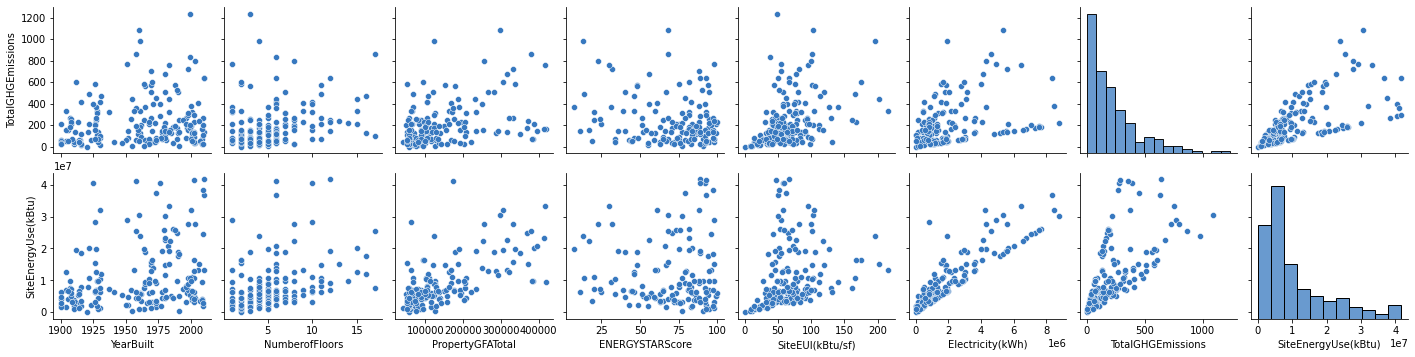

In [ ]:
# Un pairplot pour visualiser les données (uniquement sur 200 premères données car long à exécuter)
sns.pairplot(dfQ.head(200), x_vars = ['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'Electricity(kWh)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], y_vars = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'])

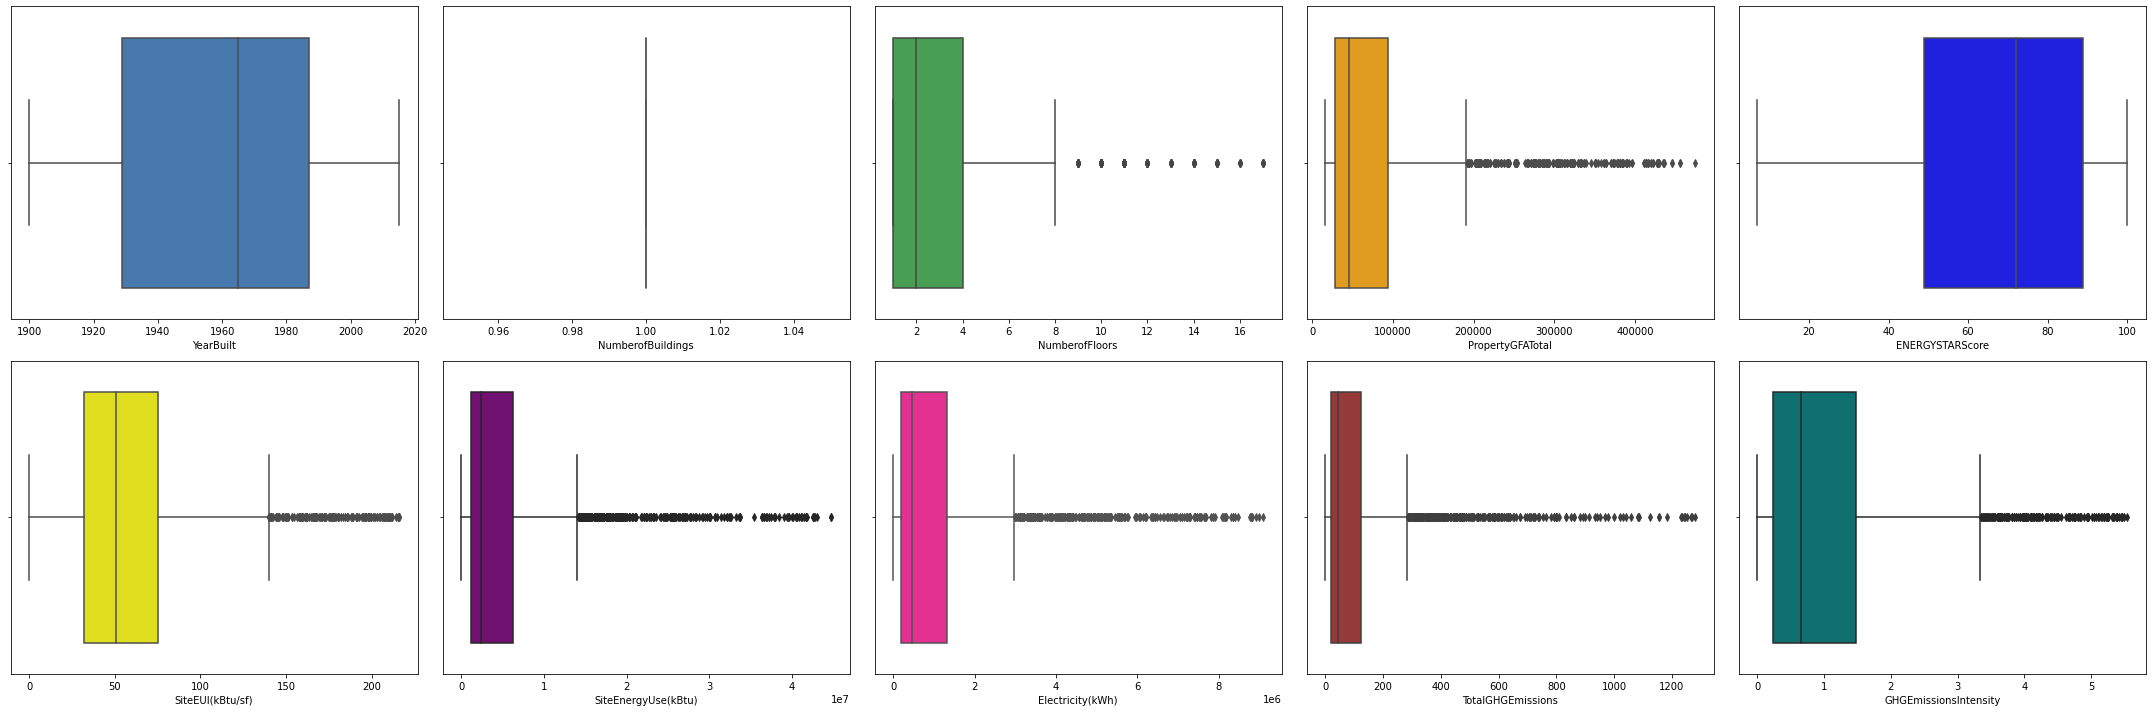

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.boxplot(data=df, x="YearBuilt", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df, x="NumberofBuildings", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df, x="NumberofFloors", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df, x="PropertyGFATotal", ax=axs[0, 3], color = custom_palette[3])
sns.boxplot(data=df, x="ENERGYSTARScore", ax=axs[0, 4], color = custom_palette[4])
sns.boxplot(data=df, x="SiteEUI(kBtu/sf)",  ax=axs[1, 0], color = custom_palette[5])
sns.boxplot(data=df, x="SiteEnergyUse(kBtu)",  ax=axs[1, 1], color = custom_palette[6])
sns.boxplot(data=df, x="Electricity(kWh)", ax=axs[1, 2], color = custom_palette[7])
sns.boxplot(data=df, x="TotalGHGEmissions", ax=axs[1, 3], color = custom_palette[8])
sns.boxplot(data=df, x="GHGEmissionsIntensity", ax=axs[1, 4], color = custom_palette[9])

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables_boxplot", dpi=400)
plt.show()

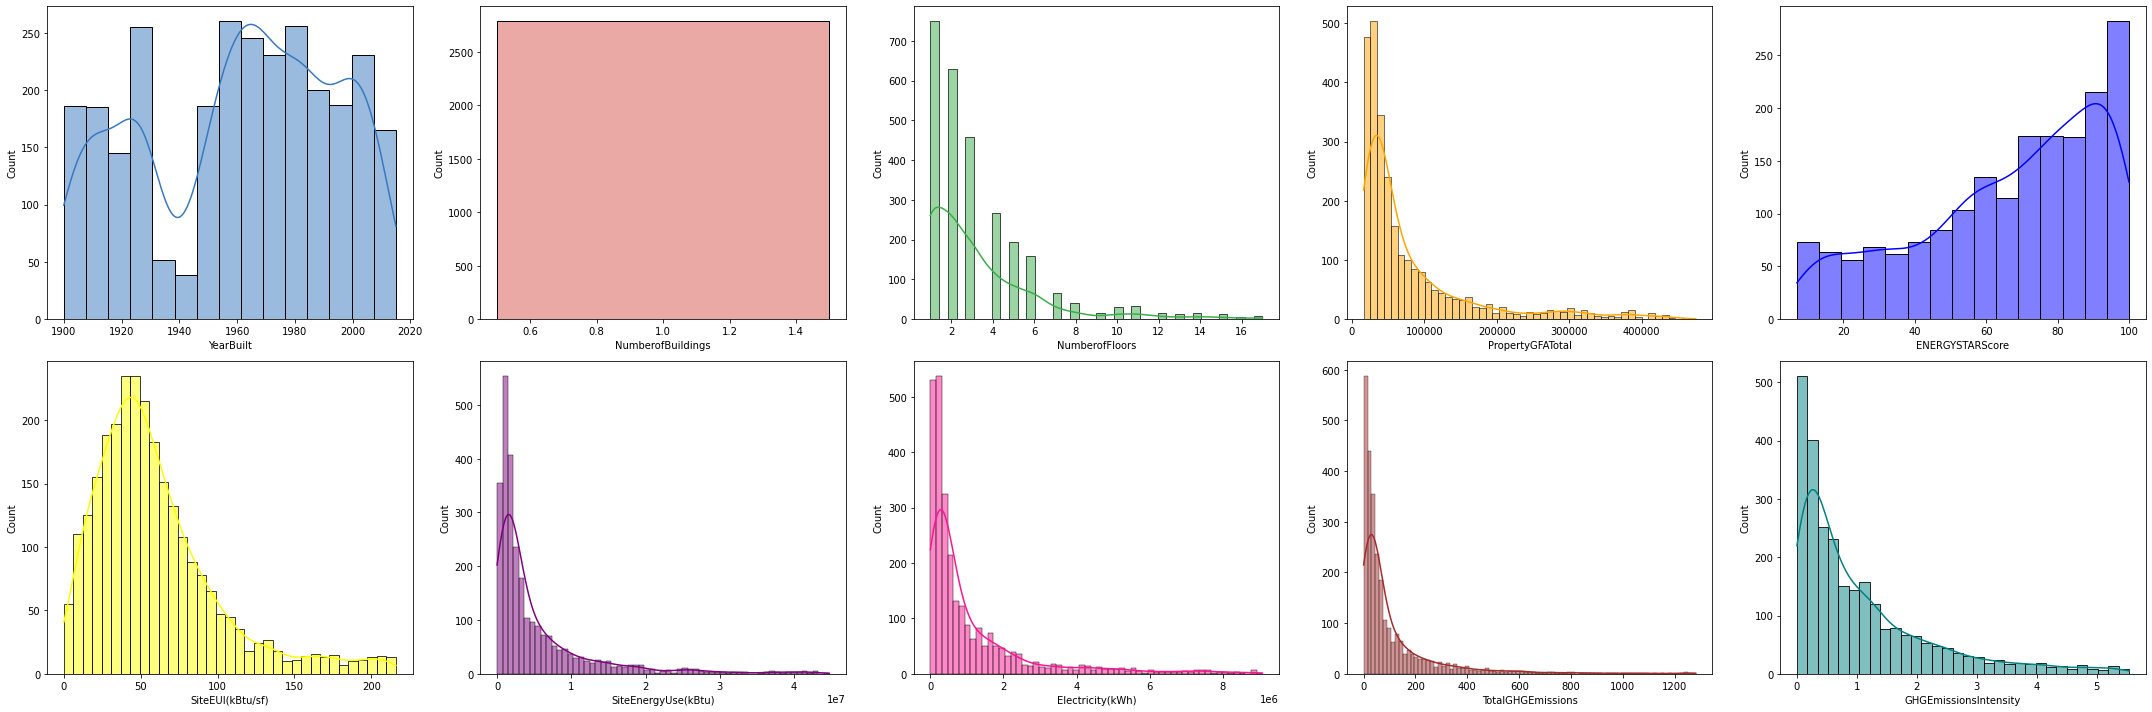

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.histplot(data=df, x="YearBuilt", kde=True, ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df, x="NumberofBuildings", kde=True, ax=axs[0, 1], color = custom_palette[1])
sns.histplot(data=df, x="NumberofFloors", kde=True, ax=axs[0, 2], color = custom_palette[2])
sns.histplot(data=df, x="PropertyGFATotal", kde=True, ax=axs[0, 3], color = custom_palette[3])
sns.histplot(data=df, x="ENERGYSTARScore", kde=True, ax=axs[0, 4], color = custom_palette[4])
sns.histplot(data=df, x="SiteEUI(kBtu/sf)", kde=True, ax=axs[1, 0], color = custom_palette[5])
sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True, ax=axs[1, 1], color = custom_palette[6])
sns.histplot(data=df, x="Electricity(kWh)", kde=True, ax=axs[1, 2], color = custom_palette[7])
sns.histplot(data=df, x="TotalGHGEmissions", kde=True, ax=axs[1, 3], color = custom_palette[8])
sns.histplot(data=df, x="GHGEmissionsIntensity", kde=True, ax=axs[1, 4], color = custom_palette[9])

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables", dpi=400)
plt.show()

On remarque qu'il y a eu beaucoup moins de construction pendant la 2nd guerre mondiale. De plus, il y a globalement plus de batiment avec un energystarsore important.

In [ ]:
dfQ.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,2823.000000,2823.000000,2823.000000,2823.000000,2785.0,2712.000000,2716.000000,2690.000000,2719.000000,2668.000000,1848.000000,2681.000000,2700.000000,2.744000e+03,2.795000e+03,2.739000e+03,2773.000000,2778.000000,2693.000000
mean,15736.038966,2015.486362,4.431456,1960.393199,1.0,3.299041,80309.341311,6239.773606,69857.628172,65593.641679,66.373918,59.636927,151.188926,5.278833e+06,1.287281e+05,1.095148e+06,11124.756778,109.851073,1.076524
std,12910.946413,0.499903,2.196454,32.816747,0.0,2.765952,84361.945754,17397.113297,68177.521785,68038.297930,25.924807,41.147620,106.205991,7.182594e+06,7.143541e+05,1.551441e+06,18737.589197,170.695280,1.149517
min,1.000000,2015.000000,1.000000,1900.000000,1.0,1.000000,16300.000000,0.000000,3636.000000,5656.000000,7.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,605.000000,2015.000000,2.000000,1929.000000,1.0,1.000000,28582.500000,0.000000,27640.000000,24298.750000,49.000000,32.099998,74.000000,1.136692e+06,0.000000e+00,1.989112e+05,0.000000,18.455000,0.240000
50%,21117.000000,2015.000000,4.000000,1965.000000,1.0,2.000000,45271.000000,0.000000,43500.000000,39874.500000,72.000000,50.500000,130.199998,2.392076e+06,0.000000e+00,4.552096e+05,3935.000000,45.450000,0.650000
75%,24484.000000,2016.000000,7.000000,1987.000000,1.0,4.000000,94002.000000,0.000000,83118.000000,78088.250000,89.000000,75.200000,193.249998,6.310770e+06,0.000000e+00,1.312323e+06,12138.000000,125.417500,1.480000
max,50094.000000,2016.000000,7.000000,2015.000000,1.0,17.000000,474546.000000,101342.000000,411584.000000,388934.000000,100.000000,216.000000,543.200000,4.473116e+07,1.092107e+07,9.086690e+06,123314.750000,1280.810000,5.540000


In [ ]:
dfQ.dropna(inplace= True)
df.dropna(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


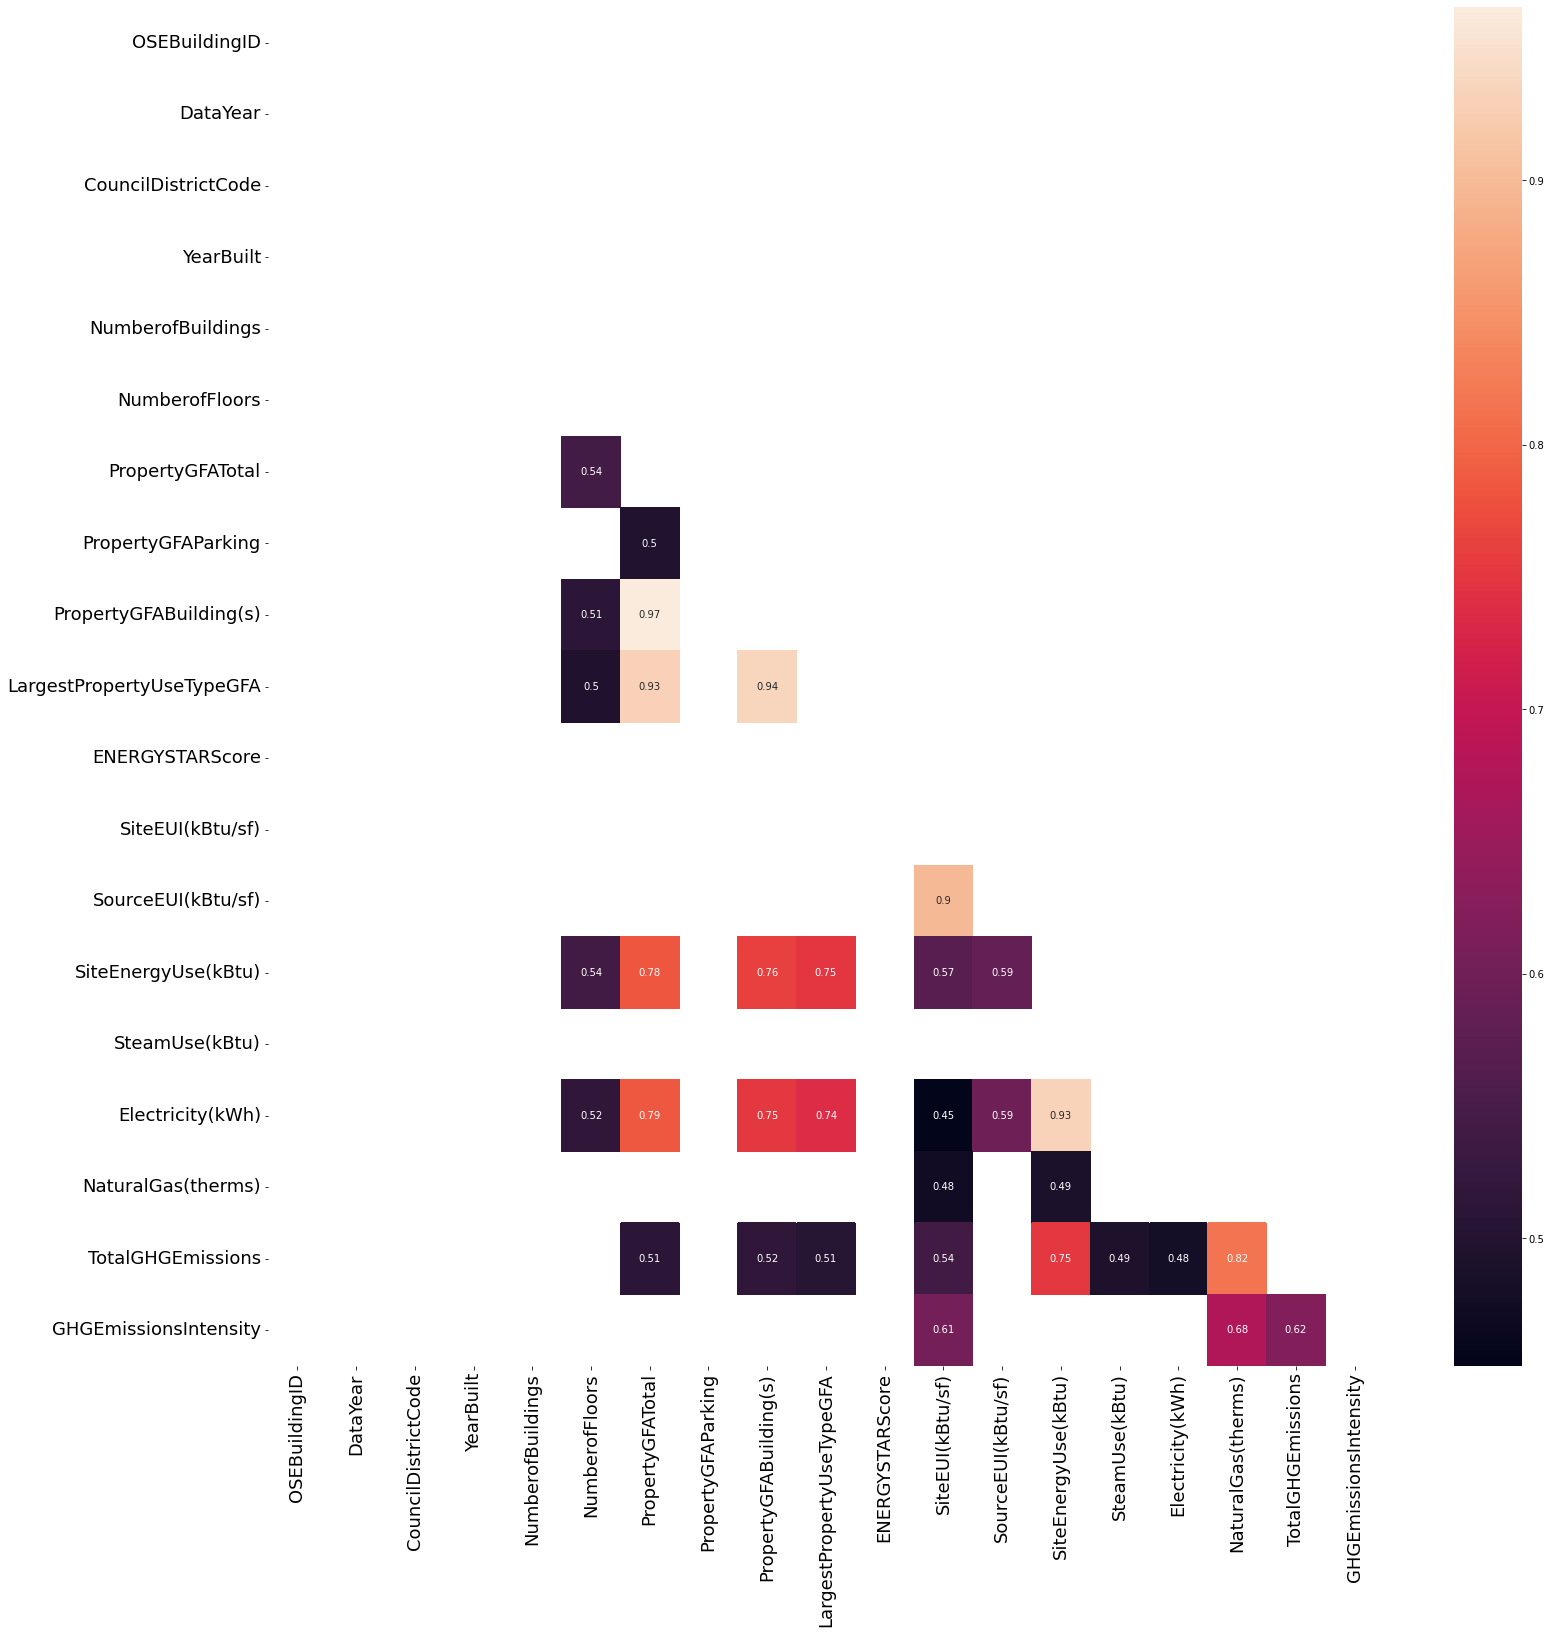

In [ ]:
def corr_corr(df=None):
	corr = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			corr[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(dfQ)                   # get p-values
corr = corr_corr(dfQ)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(25, 25))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
figure_pvalue_corr = ax.get_figure()
figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

De façon intéressante, on remarque que la variable concernant les émissions de GES est corrélée (mais avec un R relativement faible) avec : la surface et les l'utilisation de gaz et est corrélée d'une façon assez importante avec les variables *SiteEnergyUse* et *NaturalGas*
On peut notamment voir que l'ENERGYSTARScore n'est corrélé avec aucune variable, son calcul dépendant de plusieurs variables et non pas d'une seule

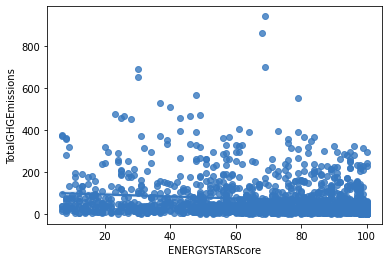

In [ ]:
ax = sns.regplot(x=dfQ['ENERGYSTARScore'], y=dfQ['TotalGHGEmissions'], data=dfQ)
stats.pearsonr(dfQ['ENERGYSTARScore'],dfQ['TotalGHGEmissions'])
figure_corr_energyscoreGES = ax.get_figure()
figure_corr_energyscoreGES.savefig("corr_energyscore et GES", dpi=400)

Comme on peut le confirmer ici, le score n'est pas uniquement fonction des émissions de GES, c'est plus complexe que ça

In [ ]:
for elm in dfQ:
	result_shapiro = stats.shapiro(dfQ[elm])
	if result_shapiro[1]< 0.05:
		print(f"La variable {str(elm)} suit une loi normale (p = {str(result_shapiro[1])} )")
	if result_shapiro[1]> 0.05:
		print(f"La variable {str(elm)} ne suit pas une loi normale (p = {str(result_shapiro[1])} )")

La variable OSEBuildingID suit une loi normale (p = 1.3082326281151487e-39 )
La variable DataYear suit une loi normale (p = 0.0 )
La variable CouncilDistrictCode suit une loi normale (p = 3.842041655435147e-36 )
La variable YearBuilt suit une loi normale (p = 1.8789675953067544e-22 )
La variable NumberofBuildings ne suit pas une loi normale (p = 1.0 )
La variable NumberofFloors suit une loi normale (p = 1.1308478607101274e-41 )
La variable PropertyGFATotal suit une loi normale (p = 3.587324068671532e-43 )
La variable PropertyGFAParking suit une loi normale (p = 0.0 )
La variable PropertyGFABuilding(s) suit une loi normale (p = 1.961817850054744e-44 )
La variable LargestPropertyUseTypeGFA suit une loi normale (p = 8.029440200581202e-43 )
La variable ENERGYSTARScore suit une loi normale (p = 1.718360302403375e-26 )
La variable SiteEUI(kBtu/sf) suit une loi normale (p = 1.2615073210294693e-27 )
La variable SourceEUI(kBtu/sf) suit une loi normale (p = 9.143476440866821e-27 )
La variable Si

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Toutes les variables suivent une loi normale (ce qu'on pouvait déjà voir sur les histogrammes), je ne fais donc pas de transformation des données de type transformation log

In [ ]:
def StudentTestSigni(df1,df2):
	"""Fonction permettant un test statistique classique (t test de student)"""
	student_test = ttest_ind(df1, df2)
	if student_test[1]< 0.05:
		print("Les valeurs sont significativement différentes (p = " + str(student_test[1]) + ")")
	elif student_test[1]> 0.05:
		print("Les valeurs ne sont pas significativement différentes (p = " + str(student_test[1]) + ")")

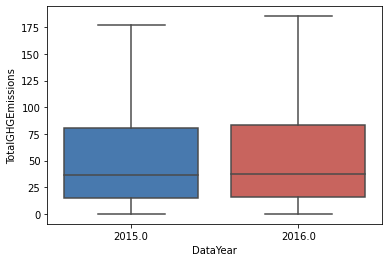

In [ ]:
ax = sns.boxplot(x=df['DataYear'], y=df["TotalGHGEmissions"], palette = custom_palette, showfliers = False)
fig = ax.get_figure()
fig.savefig("ttest_GES_2015vs2016", dpi=400)

In [ ]:
StudentTestSigni(df[df['DataYear'] == 2015]["TotalGHGEmissions"], df[df['DataYear'] == 2016]["TotalGHGEmissions"])

Les valeurs ne sont pas significativement différentes (p = 0.9567285848054988)


L'émission de GES n'a pas changé entre 2015 et 2016 ce qui est complétement attendu mais rassurant à vérifier

In [ ]:
df['YearBuilt_age'] = np.where(df['YearBuilt'] < 2000, "old", "young")

Il y a t-il une différence d'émission de GES entre des batiments "jeune" (après 2000) et plus ancien ?

In [ ]:
StudentTestSigni(df[df['YearBuilt_age'] == "old"]["TotalGHGEmissions"], df[df['YearBuilt_age'] == "young"]["TotalGHGEmissions"])

Les valeurs sont significativement différentes (p = 0.01287025081289202)


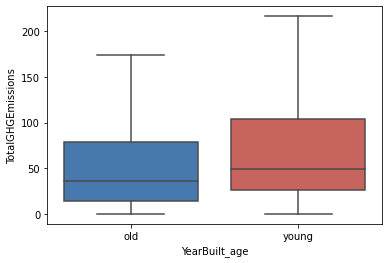

In [ ]:
ax = sns.boxplot(x=df['YearBuilt_age'], y=df["TotalGHGEmissions"], palette = custom_palette, showfliers = False)
fig = ax.get_figure()
fig.savefig("ttest_GES_youngvsold", dpi=400)

oui les batiments récents émettent plus de GES

Maintenant la question est de savoir si il y a eu des grosses différences entre 2015 et 2016 quelque soit les variables.

C'est une information en soit et aussi ça permet de voir s'il n'y a pas de différences qui ne seraient pas normales

In [ ]:
df_diff_per = (dfQ[dfQ["DataYear"] == 2016.0].set_index('OSEBuildingID').subtract(dfQ[dfQ["DataYear"] == 2015.0].set_index('OSEBuildingID')))/dfQ[dfQ["DataYear"] == 2015.0].set_index('OSEBuildingID')
df_diff_per = df_diff_per*100
df_diff_per.head(10)

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,
1.0,0.049628,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,-7.692308,3.548792,5.187320,3.508372,-0.946599,7.054222,0.318526,0.220503,7.196970
2.0,0.049628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.607843,0.423732,-7.945632,0.403364,NaN,-16.961741,15.645800,12.276574,20.168067
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,0.049628,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,8.000000,-7.932376,-1.939795,-7.901159,NaN,4.912239,-17.510982,-15.504173,-10.548523
12.0,0.049628,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,-6.521739,8.701295,3.608244,8.628289,NaN,-0.780722,21.739542,18.259401,30.601093
15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.0,0.049628,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,23.076923,-3.056351,-7.747744,-3.102137,-16.647376,-16.841524,12.218186,-1.982859,0.198413
25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29.0,0.049628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.176471,-5.530642,-2.310231,-5.598618,NaN,0.513372,-14.070289,-11.824060,-1.923077


In [ ]:
df_diff_per.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,6.960000e+02,696.0,696.0,696.0,696.0,696.000000,145.0,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,38.000000,696.000000,483.000000,696.000000,696.000000
mean,4.962779e-02,0.0,0.0,0.0,0.0,0.056587,inf,0.205716,0.889608,7.372168,2.204596,0.410695,2.307131,7.059072,-0.556125,inf,4.486256,69.827163
std,6.596690e-16,0.0,0.0,0.0,0.0,6.363037,NaN,7.469094,17.663198,60.709806,23.811784,17.842300,23.924125,21.117310,20.271025,NaN,23.507957,78.543095
min,4.962779e-02,0.0,0.0,0.0,0.0,-74.986189,-100.0,-74.986189,-34.166667,-81.395349,-52.222220,-100.000000,-50.640723,-30.005489,-100.000000,-100.000000,-100.000000,-100.000000
25%,4.962779e-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,-3.703704,-5.376091,-6.000913,-5.289772,-2.908472,-6.592458,-4.283896,-5.100225,12.475775
50%,4.962779e-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.692250,-0.436680,0.579358,4.479100,-1.228448,5.315787,2.117700,38.013136
75%,4.962779e-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,7.804940,6.060662,5.032408,5.944661,14.260290,3.948710,18.436230,10.313256,133.928571
max,4.962779e-02,0.0,0.0,0.0,0.0,108.733130,inf,67.859527,445.085000,1050.000000,437.837828,142.612939,438.445605,96.951593,191.479159,inf,220.344828,766.666667


In [ ]:
df_diff_per[df_diff_per['ENERGYSTARScore'] == 1050]

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,
20604.0,0.049628,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1050.0,-46.268658,-46.682464,-46.6272,NaN,-46.627255,NaN,-46.540881,20.0


In [ ]:
df[df['OSEBuildingID'] == 20604.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,YearBuilt_age
679,20604.0,2015.0,NonResidential,Distribution Center\n,2.0,GREATER DUWAMISH,1955.0,1.0,1.0,26680.0,...,8.0,13.4,42.2,456259.0000,0.0,133722.00000,0.0,3.18,0.05,old
2089,20604.0,2016.0,NonResidential,Distribution Center,2.0,GREATER DUWAMISH,1955.0,1.0,1.0,26680.0,...,92.0,7.2,22.5,243518.2031,0.0,71371.10156,0.0,1.70,0.06,old


In [ ]:
df_diff_per_Q = df_diff_per.select_dtypes(include=[np.number])

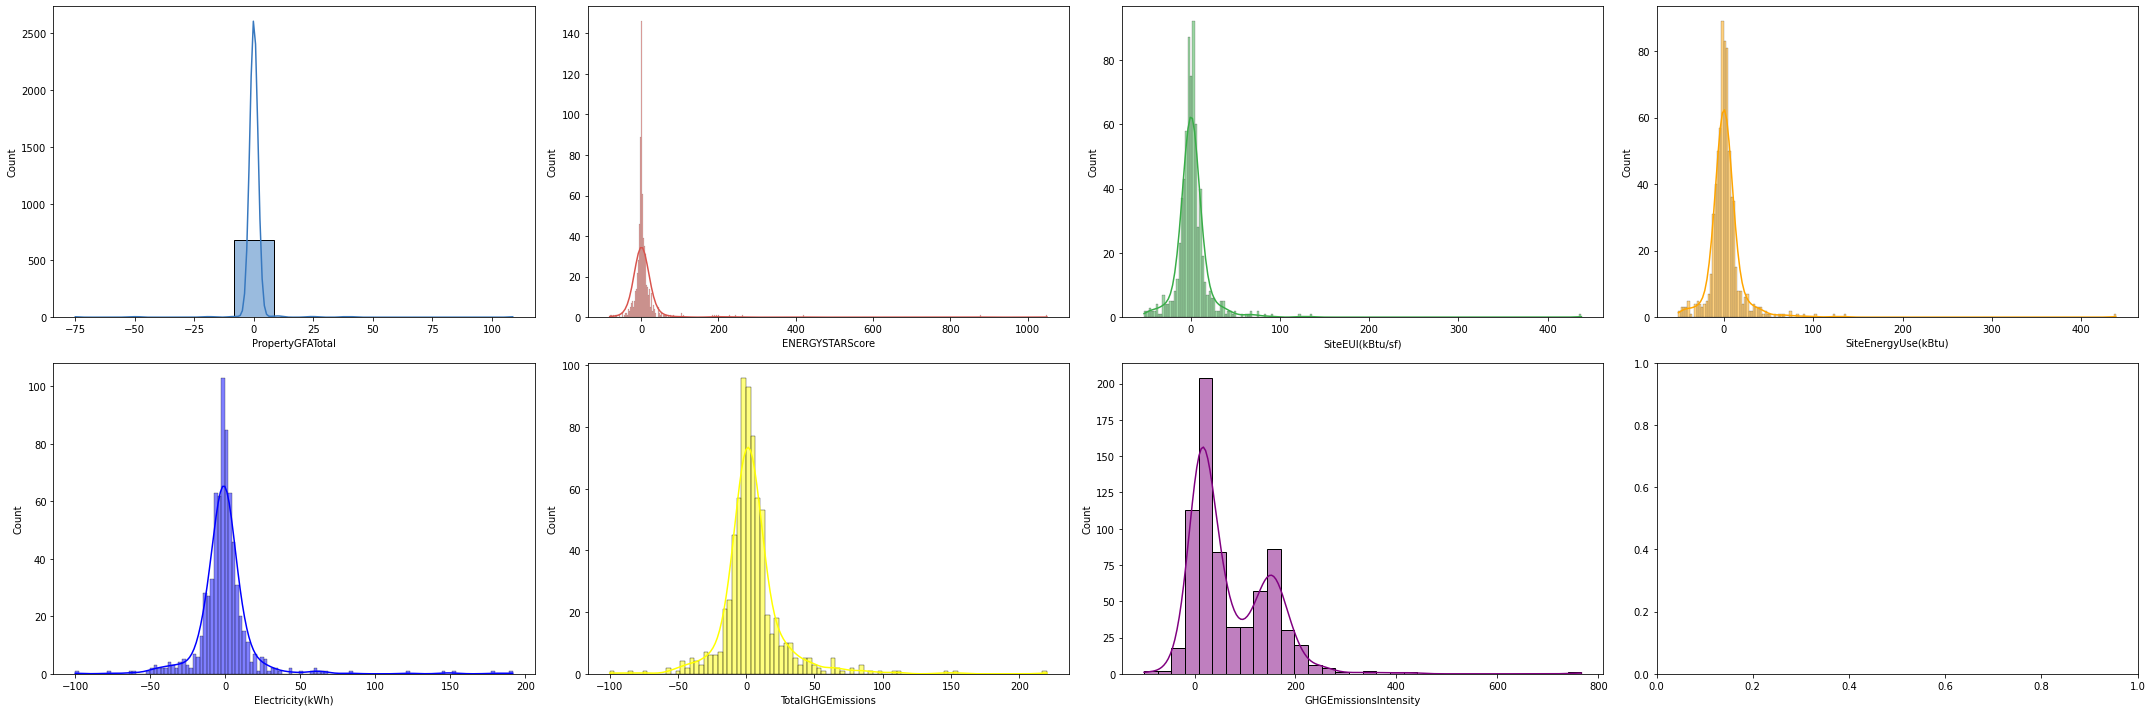

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))

sns.histplot(data=df_diff_per_Q, x="PropertyGFATotal", kde=True, ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df_diff_per_Q, x="ENERGYSTARScore", kde=True, ax=axs[0, 1], color = custom_palette[1])
sns.histplot(data=df_diff_per_Q, x="SiteEUI(kBtu/sf)", kde=True, ax=axs[0, 2], color = custom_palette[2])
sns.histplot(data=df_diff_per_Q, x="SiteEnergyUse(kBtu)", kde=True, ax=axs[0, 3], color = custom_palette[3])
sns.histplot(data=df_diff_per_Q, x="Electricity(kWh)", kde=True, ax=axs[1, 0], color = custom_palette[4])
sns.histplot(data=df_diff_per_Q, x="TotalGHGEmissions", kde=True, ax=axs[1, 1], color = custom_palette[5])
sns.histplot(data=df_diff_per_Q, x="GHGEmissionsIntensity", kde=True, ax=axs[1, 2], color = custom_palette[6])


plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables_Diff_2015-2016", dpi=400)
plt.show()

Gloabalement les résultats sont cohérents.

On remarque qu'il n'y a pas eu de variations majeures entre les deux années, en tout cas, les variations sont en moyenne positives.

On remarque par exemple que les seules variations d'émissions de GES entre 2015 et 2016 sont positives avec donc une augmentation même si cela n'est pas significatif comme on a pu le voir précédement

In [ ]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,YearBuilt_age
0,1.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1927.0,1.0,12.0,88434.0,...,65.0,78.9,173.5,6981428.0,2023032.0,1080307.0,12724.0,249.43,2.64,old
1,2.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1996.0,1.0,11.0,103566.0,...,51.0,94.4,191.3,8354235.0,0.0,1144563.0,44490.0,263.51,2.38,old
5,10.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1926.0,1.0,11.0,83008.0,...,25.0,76.9,149.5,6252842.0,0.0,785342.0,35733.0,208.46,2.37,old
7,12.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1904.0,1.0,15.0,163984.0,...,46.0,77.0,174.6,12633744.0,0.0,2155728.0,52784.0,331.61,1.83,old
10,17.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1928.0,1.0,9.0,65009.0,...,39.0,104.7,166.5,6807227.0,1987163.0,473326.0,32051.0,334.87,5.04,old


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity,YearBuilt_age
0,1.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1927.0,1.0,12.0,88434.0,...,65.0,78.9,173.5,6981428.0,2023032.0,1080307.0,12724.0,249.43,2.64,old
1,2.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1996.0,1.0,11.0,103566.0,...,51.0,94.4,191.3,8354235.0,0.0,1144563.0,44490.0,263.51,2.38,old
2,10.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1926.0,1.0,11.0,83008.0,...,25.0,76.9,149.5,6252842.0,0.0,785342.0,35733.0,208.46,2.37,old
3,12.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1904.0,1.0,15.0,163984.0,...,46.0,77.0,174.6,12633744.0,0.0,2155728.0,52784.0,331.61,1.83,old
4,17.0,2015.0,NonResidential,Hotel,7.0,DOWNTOWN,1928.0,1.0,9.0,65009.0,...,39.0,104.7,166.5,6807227.0,1987163.0,473326.0,32051.0,334.87,5.04,old


Sauvegarde de la database nettoyée

In [ ]:
df.to_csv('data_projet3_clean.csv', sep='\t', index=False)